# Customer personality analysis



### Question 1: Dataset preprocessing
Κατά την προεπεξεργασία των δεδομένων έγιναν οι εξής ενέργειες:
- Ανάθεση της στήλης ID ως το index του dataframe. Αυτό είναι χρήσιμο για να γίνονται πιο γρήγορα και αποδοτικά οι αναζητήσεις εγγραφών του dataframe με βάση το ID.
- Διαγραφή των εγγραφών που περιέχουν τουλάχιστον μία κενή τιμή
- Μετατροπή της στήλης Dt_Customer σε αντικείμενο τύπου Datetime με μορφή (ΗΜΕΡΑ-ΜΗΝΑΣ-ΕΤΟΣ)
- Δημιουργία και εφαρμογή αντιστοιχίσεων μεταξύ λεκτικών και αριθμών για τις στήλες Education και Marital_Status

In [29]:
import pandas as pd

df = pd.read_csv("marketing_campaign.csv", delimiter="\t")
df.dropna(axis=0, inplace=True)

# Change to Datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

# Convert Marital status values to integers
Marital_Status_map = {status: num for num, status in enumerate(df['Marital_Status'].unique())}
df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_map)

# Convert Education values to integers
Education_map = {education: num for num,
                      education in enumerate(df['Education'].unique())}
df['Education'] = df['Education'].map(Education_map)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,2,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1,1,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0,3,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### Question 2: Count for unique values of Marital Status and Education
Αρχικά για τα δεδομένα της στήλης Marital_Status αντικαθιστούμε τις τιμές Absurd, Alone, YOLO με την τιμή Single και στη συνέχεια δημιουργείται το διάγραμμα που δείχνει το πλήθος των ατόμων για κάθε κατηγορία (μοναδική τιμή του Marital_Status). Τέλος, θέτουμε τις τα λεκτικά των τιμών της στήλης στο διάγραμμα με βάση την δομή αντιστοίχισης μεταξύ λεκτικών και αριθμών. Την ίδια διαδικασία ακολουθούμε και για το διάγραμμα της στήλης Education.

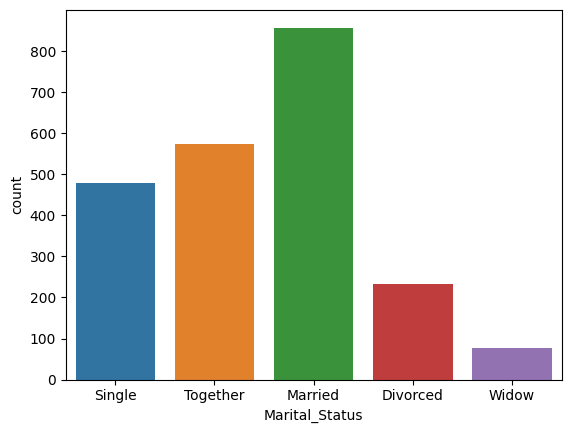

In [30]:
import seaborn as sns

# Replace dataframe unique values Absurd, Alone, YOLO with Single
df['Marital_Status'] = df['Marital_Status'].replace([Marital_Status_map['Absurd'], Marital_Status_map['Alone'], Marital_Status_map['YOLO']], Marital_Status_map['Single'])
Marital_Status_map = {status: key for status, key in Marital_Status_map.items() if status not in ['Alone', 'Absurd', 'YOLO']} # update map
plot_status = sns.countplot(x='Marital_Status', data=df)

# Set labels for marital status based on str values instead of integers
unique_statuses = [status for status in Marital_Status_map]
plot_status.set_xticklabels(unique_statuses);

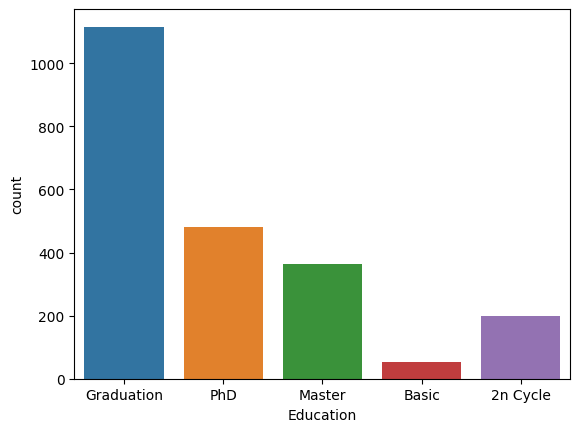

In [31]:
plot_edu = sns.countplot(x='Education', data=df)

# Set labels for Education based on str values instead of integers
unique_edu = [edu for edu in Education_map]
plot_edu.set_xticklabels(unique_edu);

### Question 3: Create new columns
Η δημιουργία νέων στηλών στο dataframe πραγματοποιείται με μία απλή ανάθεση της μορφής df['x'] = expr όπου x είναι το όνομα της στήλης και η ανάθεση εφαρμόζεται για κάθε γραμμή της στήλης. Αν θέλουμε να εφαρμόσουμε κάποια λογική if-else σε κάθε δεδομένο της στήλης χρησιμοποιούμε τη μέθοδο .apply() στο dataframe περνώντας στο όρισμα της αναφορά σε μία συνάρτηση. 

In [32]:
# A Customer For
curr_day = pd.Timestamp(pd.Timestamp.now().strftime('%Y-%m-%d'))
df['Customer_For'] = (curr_day - pd.to_timedelta(df['Recency'], unit='day')) - df['Dt_Customer']

# B Age
curr_year = pd.Timestamp.now().year
df['Age'] = curr_year - df['Year_Birth']

# C Spent
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# D Children
df['Children'] = df['Kidhome'] + df['Teenhome']

# E Family Size
def parents(x):
    if x == Marital_Status_map['Married'] or x == Marital_Status_map['Together']:
        return 2
    else:
        return 1
df['Family_Size'] = df['Children'] + df['Marital_Status'].apply(lambda x: parents(x))

# F Is_Parent
def Is_Parent(x):
    if x == Marital_Status_map['Single'] or x == Marital_Status_map['Together']:
        return 0
    else:
        return 1
df['Is_Parent'] = df['Marital_Status'].apply(lambda x: Is_Parent(x))

# G Living_With
def status(x):
    if x == Marital_Status_map['Married'] or x == Marital_Status_map['Together']:
        return 'Partner'
    else:
        return 'Alone'
df['Living_With'] = df['Marital_Status'].apply(lambda x: status(x))

# H Age Group
def age_group(age):
    if age >= 21 and age <= 30:
        return '21-30'
    elif age >= 31 and age <= 40:
        return '31-40'
    elif age >= 41 and age <= 50:
        return '41-50'
    elif age >= 51 and age <= 60:
        return '51-60'
    elif age >= 61 and age <= 70:
        return '61-70'
    elif age >= 71 and age <= 80:
        return '71-80'
    else:
        return '80-...'
df['Age_Group'] = df['Age'].apply(lambda age: age_group(age))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,0,0,58138.0,0,0,2012-09-04,58,635,...,11,1,3842 days,66,1617,0,1,0,Alone,61-70
1,2174,1954,0,0,46344.0,1,1,2014-03-08,38,11,...,11,0,3312 days,69,27,2,3,0,Alone,61-70
2,4141,1965,0,1,71613.0,0,0,2013-08-21,26,426,...,11,0,3523 days,58,776,0,2,0,Partner,51-60
3,6182,1984,0,1,26646.0,1,0,2014-02-10,26,11,...,11,0,3350 days,39,53,1,3,0,Partner,31-40
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,11,0,3304 days,42,422,1,3,1,Partner,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,2,61223.0,0,1,2013-06-13,46,709,...,11,0,3572 days,56,1341,1,3,1,Partner,51-60
2236,4001,1946,1,1,64014.0,2,1,2014-06-10,56,406,...,11,0,3200 days,77,444,3,5,0,Partner,71-80
2237,7270,1981,0,3,56981.0,0,0,2014-01-25,91,908,...,11,0,3301 days,42,1241,0,1,1,Alone,41-50
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,11,0,3385 days,67,843,1,3,0,Partner,61-70


### Question 4: Remove outliers
Για τη διαγραφή των ακραίων τιμών των δεδομένων επιλέξαμε τις στήλες Age, Income και Spent εφόσον αυτές είναι πιο σημαντικές για την ανάλυση των δεδομένων μας. Θέσαμε ένα επιτρεπτό όριο τυπικής απόκλισης για όλα τα δεδομένα. Έτσι, αφού υπολογιστεί η τυπική απόκλιση για κάθε δεδομένο του dataframe σε σχέση με τα υπόλοιπα που ανήκουν στην ίδια στήλη, διαγράφονται όσα ξεπερνούν το όριο. Η τιμή 3 επιλέχθηκε ως απόλυτη τιμή για το όριο, επειδή παρατηρήσαμε ότι διαγράφει μόνο τιμές που διαφέρουν κατά πολύ από τις υπόλοιπες με αποτέλεσμα να δημιουργούν ασυνέπειες στην μετέπειτα ανάλυση. Για παράδειγμα, διαγράφονται τιμές ηλικίας που είναι πάνω από 100.

In [33]:
from scipy import stats

zscore_limit = 3 # limit

# Age outliers
age_zscores = stats.zscore(df['Age'])
df = df.loc[abs(age_zscores) <= zscore_limit]

# Income
income_zscores = stats.zscore(df['Income'])
df = df.loc[abs(income_zscores) <= zscore_limit]

# Spent
spent_zscores = stats.zscore(df['Spent'])
df = df[abs(spent_zscores) <= zscore_limit]

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,0,0,58138.0,0,0,2012-09-04,58,635,...,11,1,3842 days,66,1617,0,1,0,Alone,61-70
1,2174,1954,0,0,46344.0,1,1,2014-03-08,38,11,...,11,0,3312 days,69,27,2,3,0,Alone,61-70
2,4141,1965,0,1,71613.0,0,0,2013-08-21,26,426,...,11,0,3523 days,58,776,0,2,0,Partner,51-60
3,6182,1984,0,1,26646.0,1,0,2014-02-10,26,11,...,11,0,3350 days,39,53,1,3,0,Partner,31-40
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,11,0,3304 days,42,422,1,3,1,Partner,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,2,61223.0,0,1,2013-06-13,46,709,...,11,0,3572 days,56,1341,1,3,1,Partner,51-60
2236,4001,1946,1,1,64014.0,2,1,2014-06-10,56,406,...,11,0,3200 days,77,444,3,5,0,Partner,71-80
2237,7270,1981,0,3,56981.0,0,0,2014-01-25,91,908,...,11,0,3301 days,42,1241,0,1,1,Alone,41-50
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,11,0,3385 days,67,843,1,3,0,Partner,61-70


### Question 5: Heatmap to find characteristics correlations
Στο παρακάτω διάγραμμα heatmap παρατηρούμε τη συσχέτιση των δεδομένων για κάθε στήλη του dataframe με τα δεδομένα των υπόλοιπων στηλών. Η συσχέτιση μεταξύ δύο στηλών αναπαρίσταται με βάση έναν αριθμό από το -1 έως το 1. Αν ο αριθμός είναι θετικός, τότε όσο μεγαλύτερος είναι τόσο μεγαλύτερη και η συσχέτιση ή αλλιώς αυξάνονται με παρόμοιο ρυθμό τα δεδομένα των εκάστοτε στηλών. Αν έχουμε αρνητική συσχέτιση, τότε όσο αυξάνονται οι τιμές της μίας στήλης, οι τιμές της άλλης τείνουν να μειώνονται.

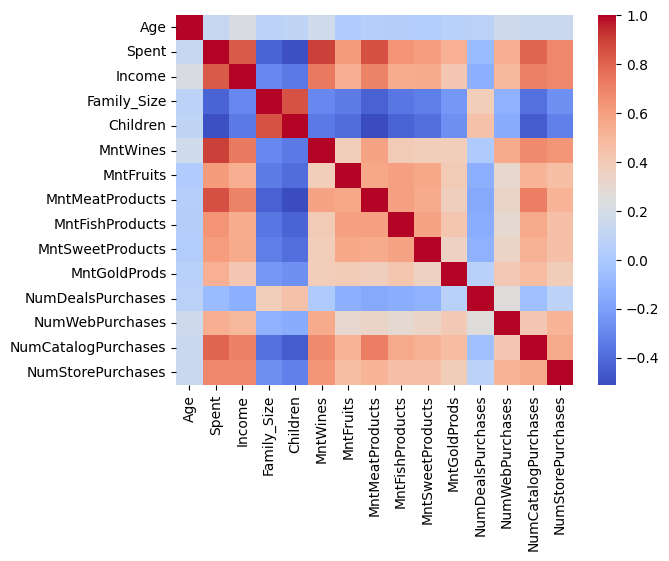

In [34]:
import matplotlib.pyplot as plt
df_heatmap = df[['Age', 'Spent', 'Income', 'Family_Size', 'Children', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
sns.heatmap(df_heatmap.corr(), annot=False, cmap='coolwarm');

### Question 6: Plots
plots
- countplot: δείχνει το πλήθος για κάθε μοναδική τιμή μιας στήλης
- boxplot: δείχνει τη σχέση ανάμεσα σε δεδομένα απο διαφορετικές στήλες, αφου βρίσκει τον διάμεσο (γραμμή), την ελάχιστη και μέγιστη τιμή (πάνω και κάτω γραμμή), πόσο διάχυτα είναι τα δεδομένα στο πάνω και κάτω τεταρτημόριο, καθώς και κάποιες τιμές που θεωρούνται outliers (ρόμβοι). Είναι σημαντικό εδώ να αναφέρουμε ότι οι outliers τιμές που δείχνουν τα διαγράμματα δεν επηρεάζουν αρνητικά την ανάλυση μας, οπότε και δεν περιορίσαμε περαιτέρω τα δεδομένα μας.
- histogram: δείχνει το πλήθος για κάθε τιμή της στήλης που μας ενδιαφέρει. Αν οι τιμές είναι πολλές (π.χ. Income), τότε γίνεται ομαδοποίηση των τιμών αυτών.

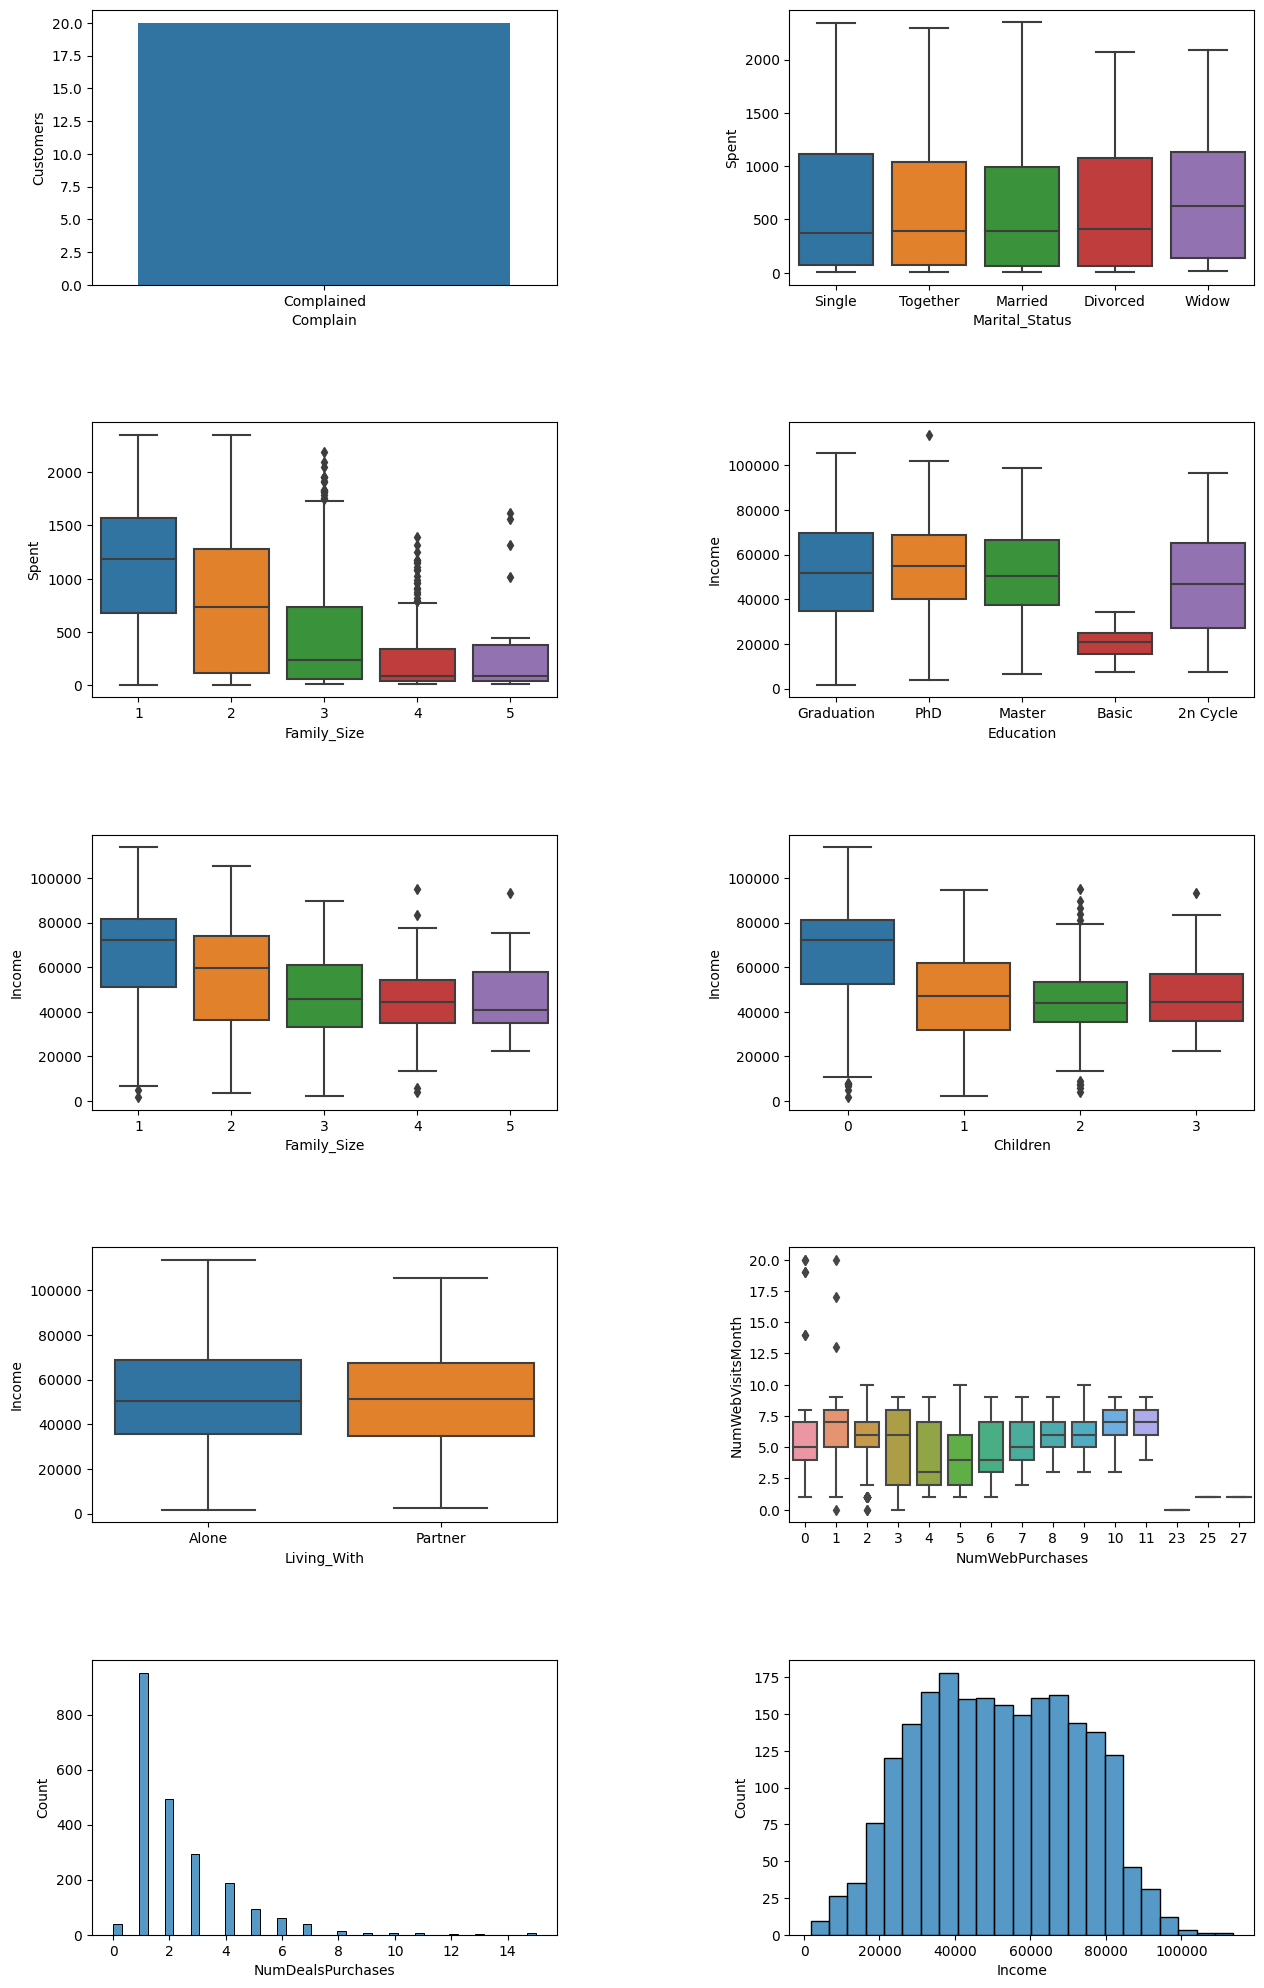

In [35]:
# 2 x 5 grid of plots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# 2. Number of customers that have complained
complain_plot = sns.countplot(x='Complain', data=df.loc[df['Complain'] == 1], ax=axs[0, 0])
complain_plot.set_ylabel('Customers')
complain_plot.set_xticklabels(['Complained'])

# 3. Marital status and Spent
Spent_Marital_plot = sns.boxplot(x='Marital_Status', y='Spent', data=df, ax=axs[0, 1])
Spent_Marital_plot.set_xticklabels(unique_statuses)

# 4. Family_Size and Spent
sns.boxplot(x='Family_Size', y='Spent', data=df, ax=axs[1, 0])

# 7. Education and Income
Edu_Income_plot = sns.boxplot(x='Education', y='Income', data=df, ax=axs[1, 1])
Edu_Income_plot.set_xticklabels(unique_edu)

# 8. Family_Size and Income
sns.boxplot(x='Family_Size', y='Income', data=df, ax=axs[2, 0])

# 9. Children and Income
sns.boxplot(x='Children', y='Income', data=df, ax=axs[2, 1])

# 10. Living With and Income
sns.boxplot(x='Living_With', y='Income', data=df, ax=axs[3, 0])

# 12. Number of web purhcases and number of visits per month
sns.boxplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df, ax=axs[3, 1])

# 14. NumDealsPurchases
sns.histplot(data=df, x='NumDealsPurchases', ax=axs[4, 0])

# 15. histogram Income
sns.histplot(data=df, x='Income', ax=axs[4, 1])

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# show the plot
plt.show()

### Question 7: LabelEncoder() following 'One Hot Encoding' logic
Ο LabelEncoder() είναι library που μετατρέπει κατηγορήματα (γενικά μη αριθμητικά δεδομένα) σε αριθμητικά. Για παράδειγμα, στον πραγματικό κόσμο ένας άνθρωπος έχει φύλο άντρας/γυναίκα. Ο LabelEncoder() διαβάζει τέτοιου είδους δεδομένα και τα μετατρέπει σε αριθμητικά (π.χ. άνδρας=0, γυναίκα=1) κλπ κλπ. Αναγνωρίζει πόσες διαφορετικές unique τιμές ενός κατηγορήματος εμφανίζονται στα δεδομένα, και τα κάνει map σε τιμές από 0 έως "πλήθος unique διαφορετικών τιμών - 1". Η χρήση του LabelEncoder() χρησιμοποιείται σε αυτό το σημείο, και πριν τον StandardScaler(), διότι ο δεύτερος πρέπει να δεχτεί αριθμητικές τιμές για να τις κανονικοποιήσει.


In [36]:
# Importing SciKit Learn packages
from sklearn.preprocessing import LabelEncoder

# Education
# Initialize 'Education' unique values set
education_data = {'Education': ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']}

# Use LabelEncoder to convert category values to numerical values and create a new column in the DataFrame
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

# Marital_Status
# Initialize 'Marital_Status' unique values set
marital_status_data = {'Marital_Status': ['Single', 'Together', 'Married', 'Divorced', 'Widow']}

# Use LabelEncoder to convert category values to numerical values and create a new column in the DataFrame
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

# Living_With
# Initialize 'Living_With' unique values set
education_data = {'Living_With': ['Alone', 'Partner']}

# Use LabelEncoder to convert category values to numerical values and create a new column in the DataFrame
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,0,0,58138.0,0,0,2012-09-04,58,635,...,11,1,3842 days,66,1617,0,1,0,0,61-70
1,2174,1954,0,0,46344.0,1,1,2014-03-08,38,11,...,11,0,3312 days,69,27,2,3,0,0,61-70
2,4141,1965,0,1,71613.0,0,0,2013-08-21,26,426,...,11,0,3523 days,58,776,0,2,0,1,51-60
3,6182,1984,0,1,26646.0,1,0,2014-02-10,26,11,...,11,0,3350 days,39,53,1,3,0,1,31-40
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,11,0,3304 days,42,422,1,3,1,1,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,2,61223.0,0,1,2013-06-13,46,709,...,11,0,3572 days,56,1341,1,3,1,1,51-60
2236,4001,1946,1,1,64014.0,2,1,2014-06-10,56,406,...,11,0,3200 days,77,444,3,5,0,1,71-80
2237,7270,1981,0,3,56981.0,0,0,2014-01-25,91,908,...,11,0,3301 days,42,1241,0,1,1,0,41-50
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,11,0,3385 days,67,843,1,3,0,1,61-70


In [37]:
# making a copy of the current DataFrame (df)
df_copy = df.copy()

# deleting columns related to promoting and special offers
df_copy = df_copy.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)

df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,0,0,58138.0,0,0,2012-09-04,58,635,...,3,11,3842 days,66,1617,0,1,0,0,61-70
1,2174,1954,0,0,46344.0,1,1,2014-03-08,38,11,...,3,11,3312 days,69,27,2,3,0,0,61-70
2,4141,1965,0,1,71613.0,0,0,2013-08-21,26,426,...,3,11,3523 days,58,776,0,2,0,1,51-60
3,6182,1984,0,1,26646.0,1,0,2014-02-10,26,11,...,3,11,3350 days,39,53,1,3,0,1,31-40
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,3,11,3304 days,42,422,1,3,1,1,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,2,61223.0,0,1,2013-06-13,46,709,...,3,11,3572 days,56,1341,1,3,1,1,51-60
2236,4001,1946,1,1,64014.0,2,1,2014-06-10,56,406,...,3,11,3200 days,77,444,3,5,0,1,71-80
2237,7270,1981,0,3,56981.0,0,0,2014-01-25,91,908,...,3,11,3301 days,42,1241,0,1,1,0,41-50
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,3,11,3385 days,67,843,1,3,0,1,61-70


Ο StandardScaler() by default κανονικοποιεί τα δεδομένα ώστε η κατανομή τους να έχει μ=0 και σ=1 σε κάθε column.

In [38]:
from sklearn.preprocessing import StandardScaler

# function to convert an 'Age Group' (age range) string into numerical value
def convert_age_range(age_range):

    age_range = age_range.split('-')
    age = (int(age_range[0]) / 10) + 1
    return age

# convert Timestamp values into numerical values
df_copy['Dt_Customer'] = df_copy['Dt_Customer'].apply(lambda x: x.timestamp() if isinstance(x, pd.Timestamp) else x)

# convert Timedelta values into numerical values
df_copy['Customer_For'] = df_copy['Customer_For'].apply(lambda x: x.days if isinstance(x, pd.Timedelta) else x)

# convert 'Age_Group' values form strings into numerical values
# for example, range '51-60' is converted into '6', because '51-60' range represents the 6th decade of a human's life
df_copy['Age_Group'] = df_copy['Age_Group'].apply(convert_age_range)

# create an instance of the StandardScaler object
scaler = StandardScaler()

# fit and standardize the DataFrame (df_copy), after the numerical conversions we made
df_standardized = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

df_standardized

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,-0.019751,-1.017280,-0.779235,-1.416359,0.318592,-0.824976,-0.932743,-1.525596,0.310698,0.988881,...,0.0,0.0,1.471968,1.017280,1.703856,-1.270346,-1.762502,-1.054194,-1.347925,0.942614
1,-1.050739,-1.274070,-0.779235,-1.416359,-0.251874,1.036508,0.904351,1.189047,-0.380335,-0.875387,...,0.0,0.0,-1.127634,1.274070,-0.966605,1.401510,0.446273,-1.054194,-1.347925,0.942614
2,-0.445380,-0.332505,-0.779235,-0.461998,0.970367,-0.824976,-0.932743,0.206840,-0.794955,0.364471,...,0.0,0.0,-0.092698,0.332505,0.291367,-1.270346,-0.658115,-1.054194,0.741881,0.113180
3,0.182753,1.293835,-0.779235,-0.461998,-1.204650,1.036508,-0.932743,1.060719,-0.794955,-0.875387,...,0.0,0.0,-0.941248,-1.293835,-0.922937,0.065582,0.446273,-1.054194,0.741881,-1.545688
4,-0.081303,1.037045,0.017011,0.492364,0.326089,1.036508,-0.932743,0.952133,1.554557,-0.391394,...,0.0,0.0,-1.166874,-1.037045,-0.303188,0.065582,0.446273,0.948592,0.741881,-0.716254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1.625520,-0.161311,-0.779235,0.492364,0.467811,-0.824976,0.904351,-0.133724,-0.103922,1.209964,...,0.0,0.0,0.147642,0.161311,1.240305,0.065582,0.446273,0.948592,0.741881,0.113180
2196,-0.488466,-1.958845,0.017011,-0.461998,0.602810,2.897993,0.904351,1.653005,0.241595,0.304718,...,0.0,0.0,-1.676984,1.958845,-0.266238,2.737437,2.655049,-1.054194,0.741881,1.772048
2197,0.517593,1.037045,-0.779235,1.446725,0.262629,-0.824976,-0.932743,0.981747,1.450902,1.804497,...,0.0,0.0,-1.181588,-1.037045,1.072351,-1.270346,-1.762502,0.948592,-1.347925,-0.716254
2198,0.814579,-1.102876,0.813256,-0.461998,0.855829,-0.824976,0.904351,0.976812,-1.416885,0.370446,...,0.0,0.0,-0.769576,1.102876,0.403896,0.065582,0.446273,-1.054194,0.741881,0.942614


In [39]:
# processing the new DataFrame (df_standardized) using PCA

# import the PCA module
from sklearn.decomposition import PCA


# define number of dimensions (= components) we want our data to be reduced to
pca = PCA(n_components=3)
pca.fit(df_standardized)
pca_components = pca.transform(df_standardized)

df_PCA = pd.DataFrame(pca_components, columns=['PCA_1', 'PCA_2', 'PCA_3'])

Το 3D plot είναι interactive για καλύτερη οπτικοποίηση και αντίληψη των αποτελεσμάτων (mouse drag και zooming):

In [40]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Define the data for the 3D scatter plot
data = go.Scatter3d(x=df_PCA['PCA_1'], y=df_PCA['PCA_2'], z=df_PCA['PCA_3'], mode='markers', marker=dict(size=4, color='red', opacity=0.8))

# Define the layout for the plot
layout = go.Layout(title='3D Plot of PCA components', width=800, height=800, margin=dict(l=0, r=0, t=50, b=0), scene=dict(xaxis_title='PCA_1', yaxis_title='PCA_2', zaxis_title='PCA_3'))

# Combine the data and layout into a figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

### Question 8: Clustering

* Ο αλγόριθμος ELBOW εφαρμόζεται σε κανονικοποιημένα δεδομένα, επομένως πρέπει να χρησιμοποιήσουμε την 
κανονικοποιημένη έκδοση του .csv file μας. Αυτή είναι το df_standardized dataframe. Η μέθοδος ELBOW υπολογίζει το βέλτιστο αριθμό clusters που πρέπει να εφαρμόσουμε πάνω σε ένα dataset για την καλύτερη απεικόνιση/συσχέτιση των δεδομένων. Εισάγουμε ένα εύρος τιμών που ισούται με τα διάφορα πλήθη των clusters, τα οποία θέλουμε να ελέγξουμε για να βρούμε ποιο είναι το καταλληλότερο για το dataset μας. Ο αλγόρθμος υπολογίζει το SSE (=Sum of Square Errors), δηλ. το άθροισμα των τετραγωνικών σφαλμάτων συναρτήσει του πλήθους των clusters κάθε φορά. Έτσι, ορίζεται μια συνάρτηση, η οποία με τη σειρά της αναπαρίσταται από ένα διάγραμμα συσχέτισης 'SSE-num of clusters'. 
* Για παράδειγμα, στο παρακάτω διάγραμμα, αρχικά παρατηρούμε ότι όσο περισσότερα clusters θεωρούμε, τόσο μειώνεται το SSE (είναι αναμενόμενο αφού όσο πιο πολλά clusters centroids έχουμε, δεν θα υπάρχουν πολλά data points πολύ απομακρυσμένα από τα centroids, άρα και οι όροι αθροίσματος του SSE θα είναι κατά πλειοψηφία μικρότεροι). Από ένα πλήθος clusters και μετά, η μεταβολή του SSE δεν είναι σημαντική. Αντίθετα, αν επιλέξουμε να έχουμε λίγα cluster (=cluster centroids) τότε θα εμφανίζονται περισσότερα απομακρυσμένα data points (=μεγαλύτερο square error), άρα και το SSE συνολικά θα αυξάνεται σε τιμή.
* Προκειμένου να βρούμε το βέλτιστο πλήθος clusters, ελέγχουμε σε ποιο σημείο του διαγράμματος (σε ποια τιμή #clusters) αρχίζει να αυξάνει πολύ γρήγορα το SSE (στο παράδειγμά μας αυτό συμβαίνει για #clusters=3 ή 4). Αυτό είναι το σημείο/περιοχή που σχηματίζει μια "γωνία" και γι'αυτό λέγεται ELBOW.

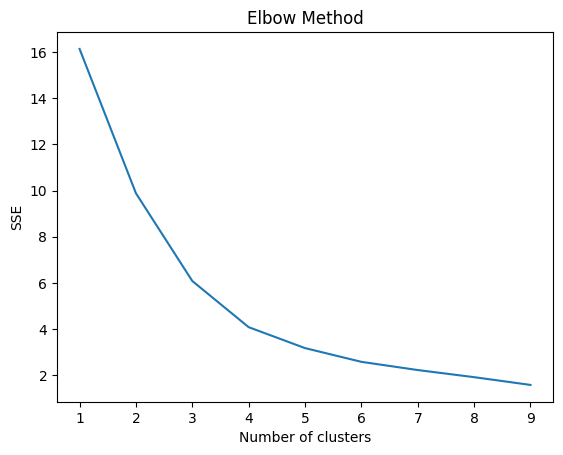

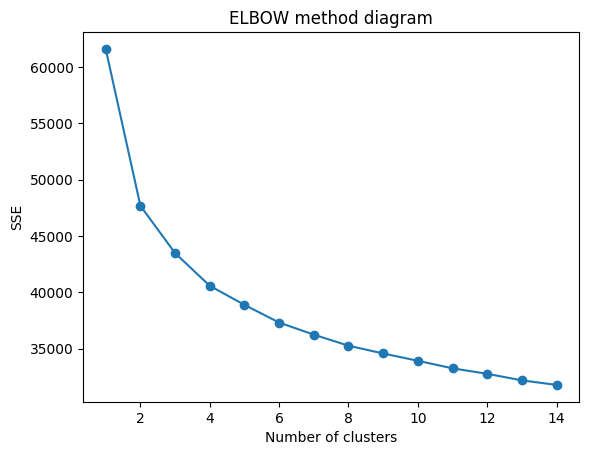

In [41]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')   # suppressing non-vital warnings regarding the change of value of some variables

# Determine the optimal #clusters using the ELBOW method
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_standardized)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('ELBOW method diagram')
plt.show()


Βλέπουμε, λοιπόν, ότι για #clusters <4 το SSE αρχίζει να αυξάνεται πολύ γρήγορα, επομένως το "ELBOW" σημείο θεωρούμε ότι είναι #clusters=4.

* Οι αλγόριθμοι Agglomerative και Kmeans εφαρμόζονται σε κανονικοποιημένα δεδομένα, επομένως πρέπει να χρησιμοποιήσουμε την κανονικοποιημένη έκδοση του .csv file μας. Επίσης, για να έχουμε καλύτερο cluster visualization, χρησιμοποιούμε την reduced έκδοση των data μας (εκείνη με τα PCA_1, PCA_2, PCA_3), δηλ. το df_PCA. Η λογική του Agglomerative είναι ότι σταδιακά προσπαθεί να δημιουργήσει μια δενδροειδή δομή συσχέτισης μεταξύ των δεδομένων, ώστε τελικά να κατασκευάσει ένα ενιαίο cluster με όλα τα data points. Από την άλλη, ο Kmeans ακολουθεί μια partitioning λογική, κατά την οποία αφού καθορισθεί ο #clusters, ο αλγόριθμος σε κάθε βήμα κάνει assign κάποιο data point στο κοντινότερο cluster centroid. Τα centroids μπορούν να μεταβάλλονται ώστε να γίνει το optimal assignment και clustering των data points. Επαναλαμβάνει τη διαδικασία μέχρις ότου τα centroids πρακτικά να μην μεταβάλλονται και να υπάρχει "ισορροπία" στο σύστημα/δομή των clusters.
* Το silhouette score είναι ένα metric αξιολόγησης της ομοιότητας ενός data point με το cluster του, δηλαδή δείχνει ουσιαστικά και την ποιότητα του clustering που επιλέξαμε. Η τιμή του κυμαίνεται από -1 έως 1. Το -1 σημαίνει ελάχιστη ομοιότητα με το cluster του, ενώ το 1 σημαίνει μέγιστη/"τέλεια" ομοιότητα. Όταν το score=0, αυτό δείχνει ότι το data point είναι στο μεταίχμιο μεταξύ 2 clusters (δηλαδή μοιάζει εξίσου και με τα δύο).
* Πολύ συνοπτικά, το silhouette score προκύπτει από τον υπολογισμό της average απόστασης του data point από τα υπόλοιπα που ανήκουν στο cluster του (= intra-cluster distance), της average απόστασής του από τα data points των γειτονικών clusters (= nearest-cluster distance) και τέλος βρίσκει το score για το εκάστοτε data point χρησιμοποιώντας αυτές τις 2 αποστάσεις και την max εξ αυτών. Αφού υπολογιστούν όλα τα data points scores, βρίσκει το συνολικό μέσο ώστε να χαρακτηρίσει ποιοτικά το clustering μας.

Το 3D plot είναι interactive για καλύτερη οπτικοποίηση και αντίληψη των αποτελεσμάτων (mouse drag και zooming). Επίσης, παρατηρούμε ότι δεν υπάρχουν cluster centroids (κέντρα) αφού ο Agglomerative δεν έχει τέτοια προσέγγιση υπολογισμού των clusters:

In [42]:
import plotly.graph_objs as go
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Perform Agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=4)  # 4 clusters as we calculated previously
agglom_labels = agglom.fit_predict(df_PCA)

# Add cluster labels to original dataset
df_PCA['Cluster'] = agglom_labels

# Create a trace for each cluster
traces = []
for i in range(4):
    trace = go.Scatter3d(
        x=df_PCA.loc[df_PCA['Cluster'] == i]['PCA_1'],
        y=df_PCA.loc[df_PCA['Cluster'] == i]['PCA_2'],
        z=df_PCA.loc[df_PCA['Cluster'] == i]['PCA_3'],
        mode='markers',
        marker=dict(
            size=4,
            color=i,  # assign a different color to each cluster
            opacity=0.8
        ),
        name=f'Cluster {i}'
    )
    traces.append(trace)

# Create the layout for the plot
layout = go.Layout(
    title='Agglomerative 3D plot',
    scene=dict(
        xaxis_title='PCA_1',
        yaxis_title='PCA_2',
        zaxis_title='PCA_3'
    ),
    width=800,  # set the width of the plot
    height=800  # set the height of the plot
)

# Create the figure object
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


Αν απλώς θέλουμε να δούμε τη δενδρική δομή που κατασκευάζει ο Agglomerative, μπορούμε να εκτελέσουμε τον ακόλουθο κώδικα στο standardized dataset μας (df_standardized) και υποθέτουμε ότι βασιζόμαστε στο συνολικό dataset μας, όχι στο reduced 3 διαστάσεων:

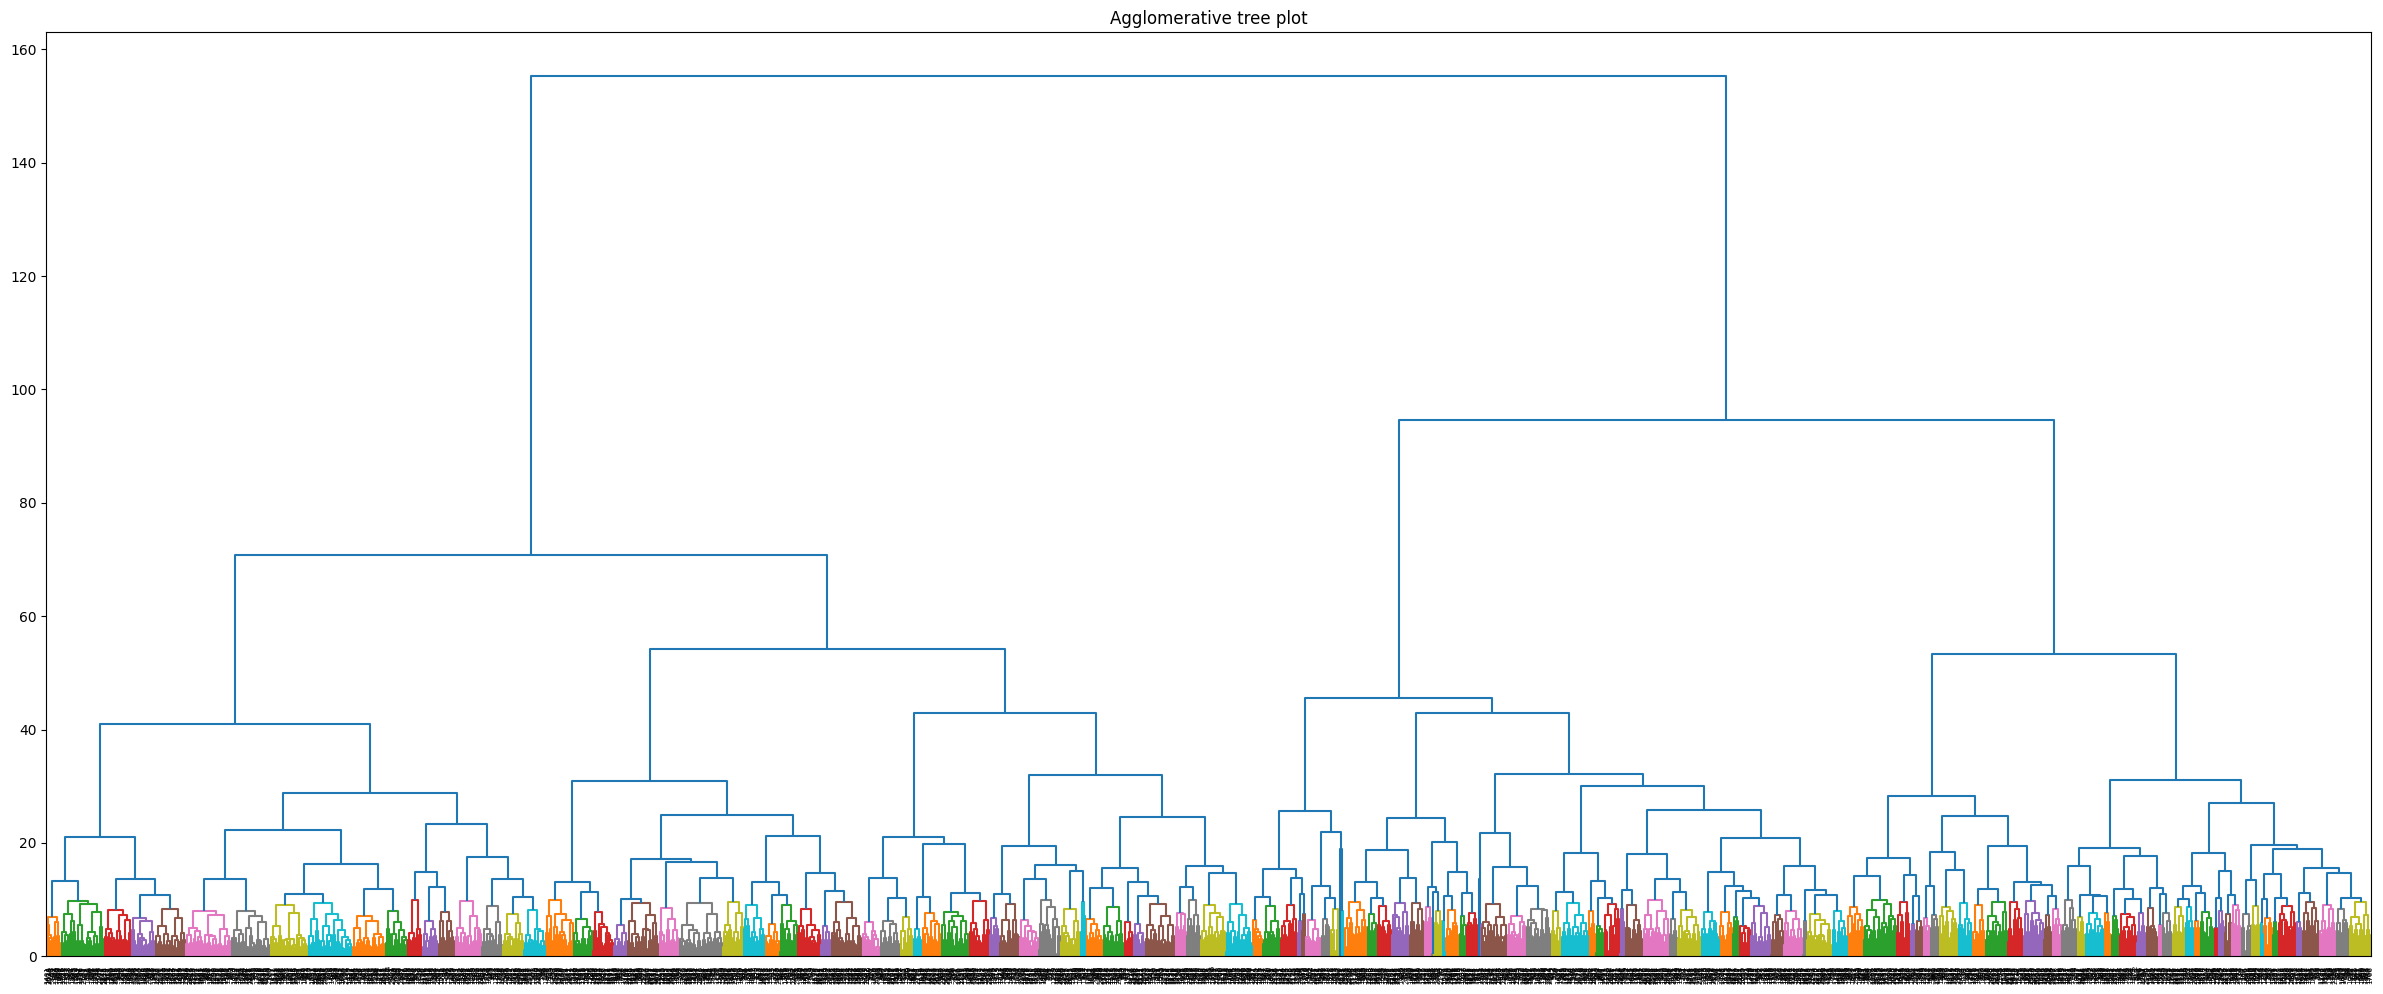

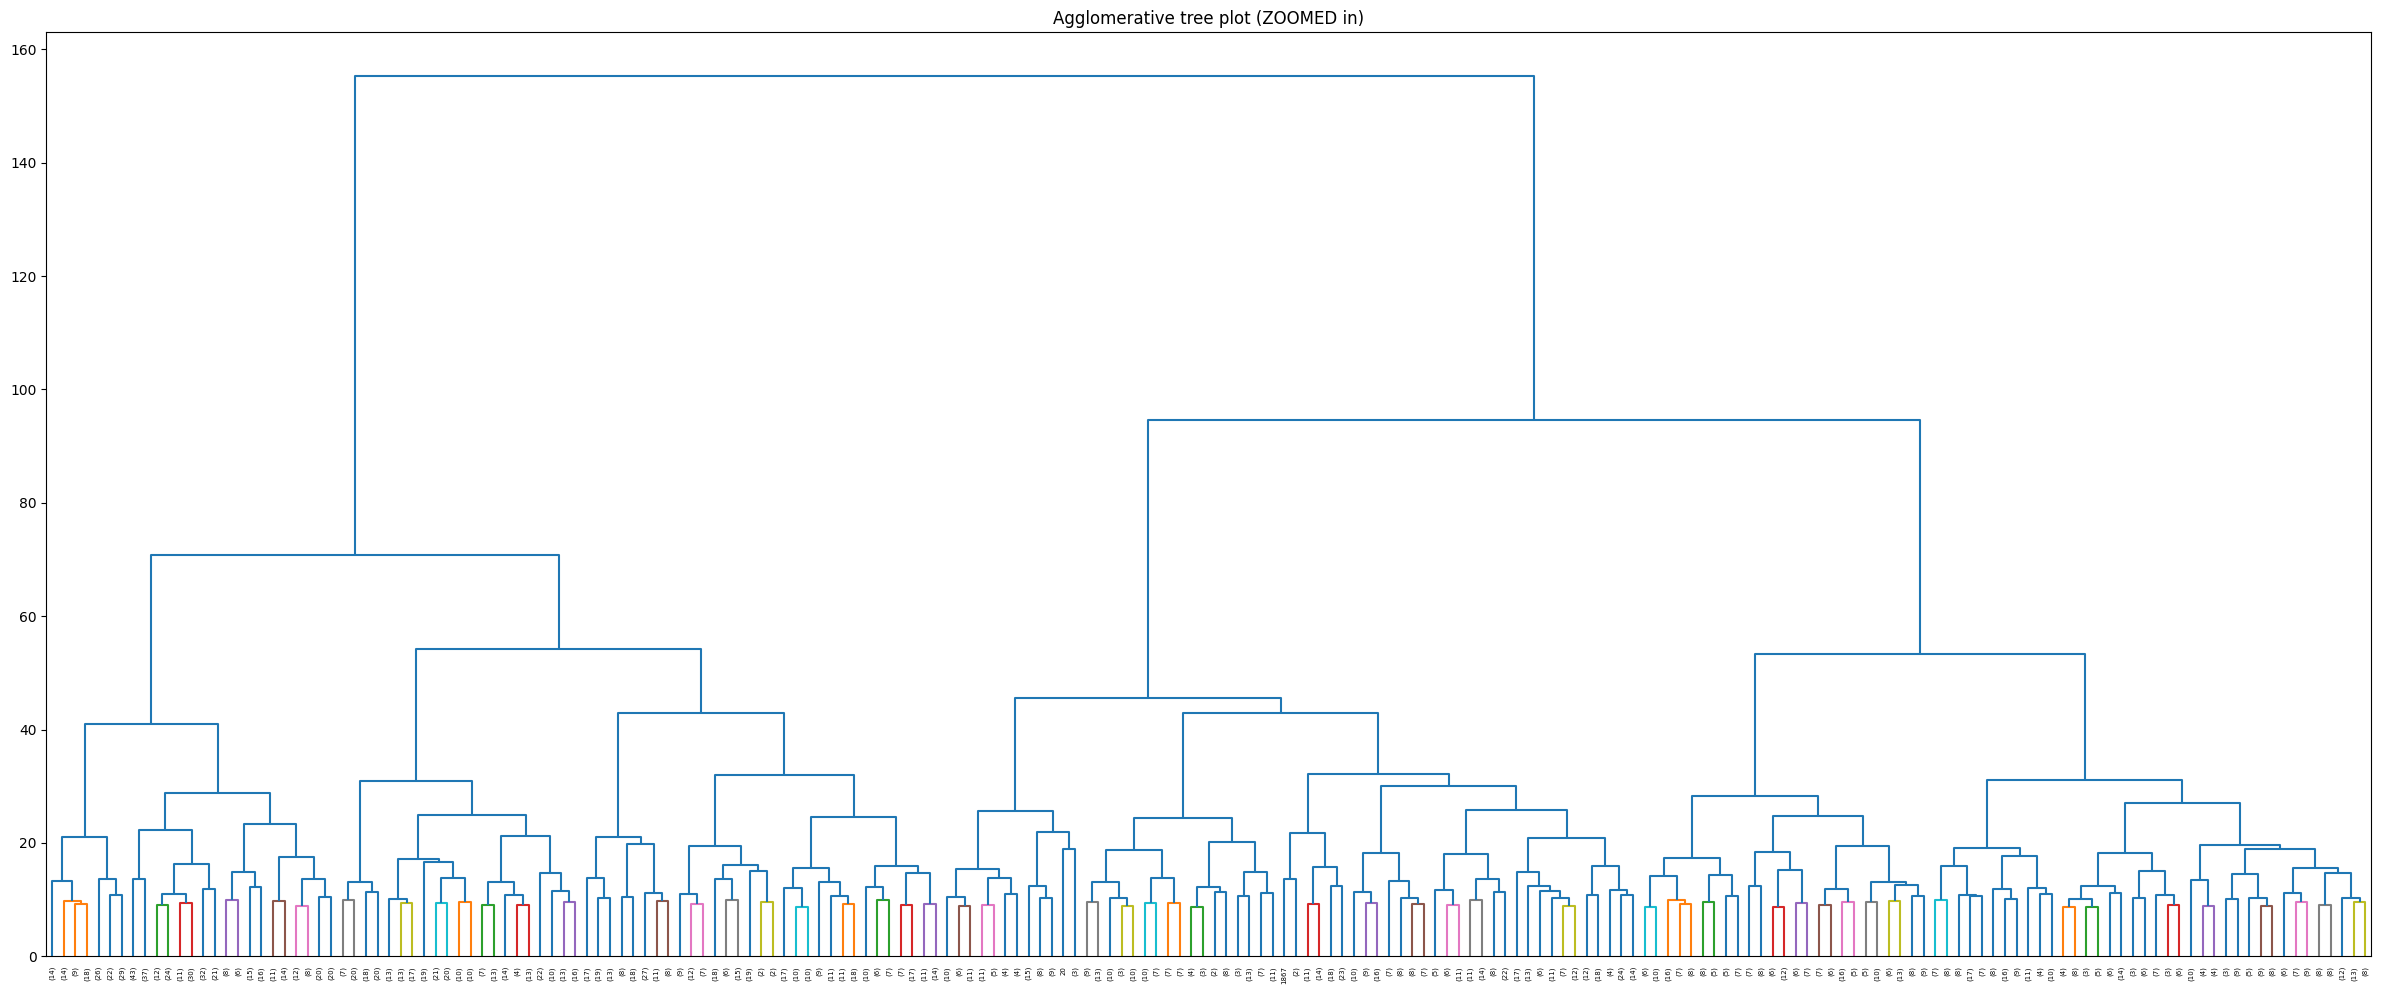

In [43]:
# Create linkage matrix
tree = linkage(df_standardized, method='ward')

# Create dendrogram with truncated branches
plt.figure(figsize=(30, 12))
dendrogram(tree, color_threshold=10)
plt.title('Agglomerative tree plot')
plt.show()

# Create dendrogram with truncated branches (ZOOMED in)
plt.figure(figsize=(30, 12))
dendrogram(tree, color_threshold=10, truncate_mode='lastp', p=200)
plt.title('Agglomerative tree plot (ZOOMED in)')
plt.show()

Στο επόμενο τμήμα κώδικα δημιουργούμε τα data clusters μέσω του K-means αλγορίθμου. Το 3D plot είναι interactive για καλύτερη οπτικοποίηση και αντίληψη των αποτελεσμάτων (mouse drag και zooming). Στο δεξί μέρος του plot, υπάρχει ένα filter box στο οποίο αν θέλουμε κάνουμε select ή unselect κάποιο χρώμα, δηλαδή κάποιο cluster, ώστε προσωρινά να το "αποκρύψουμε" από το plot. 

In [44]:
import plotly.graph_objs as go

# Prepare the data for clustering
data = df_PCA[['PCA_1', 'PCA_2', 'PCA_3']].values
n_clusters = 4

# Initialize the KMeans algorithm, #clusters=4 as we found previously
kmeans = KMeans(n_clusters)

# Fit the algorithm to the data
kmeans.fit(data)

# Get cluster labels for each data point
labels = kmeans.predict(data)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Define the color map for the clusters
colors = ['red', 'green', 'blue', 'yellow']

# Create a 3D scatter plot with different colors for each cluster
fig = go.Figure()
for i in range(n_clusters):
    x = data[labels == i][:, 0]
    y = data[labels == i][:, 1]
    z = data[labels == i][:, 2]
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color=colors[i], size=3)))

# Add the cluster centers to the plot
fig.add_trace(go.Scatter3d(x=centers[:, 0], y=centers[:, 1], z=centers[:, 2], mode='markers', marker=dict(color='black', size=6)))

# Set the labels for the axes
fig.update_layout(scene=dict(xaxis_title='PCA_1', yaxis_title='PCA_2', zaxis_title='PCA_3'), width=1000, height=800, autosize=False, margin=dict(l=50, r=50, b=50, t=50))

# Enable mouse interactions for rotating the plot
fig.update_layout(scene_camera=dict(eye=dict(x=1.7, y=-0.6, z=0.8)))

# Show the plot
fig.show()
